In [1]:
!pip install tweepy

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
access_token="Enter your access token"
access_token_secret="Enter your token secret"
api_key="Enter your API key"
api_secret_key="Enter your API secret key"

In [4]:
import tweepy

In [5]:
auth = tweepy.OAuthHandler(api_key,api_secret_key)
auth.set_access_token(access_token,access_token_secret)


In [6]:
api = tweepy.API(auth)

In [7]:
# get timeline
tweets = api.home_timeline()

In [8]:
for tweet in tweets:
  print(tweet.text)

RT @GroupAnon: #OnThisDay we cared about #BlackLivesMatter 4 years ago, and we still do today. https://t.co/SMt1UcJ1zO
Ghislaine Maxwell, confidant of accused sex-trafficker Jeffrey Epstein, argued in a court filing that she should be… https://t.co/bJGikvIb2i
How to Use Node, a Raspberry Pi, and an LCD Screen to Monitor the Weather: https://t.co/3CbttFE78i
CBP officers in El Paso seized almost 89lbs of meth hidden inside a sedan on Tuesday following a K9 alert. Learn mo… https://t.co/C4wug7CQCi
The state will add 34 fast-charging stations along Interstate 95, Interstate 4, Interstate 75, Interstate 275 and I… https://t.co/09TAjGjeh2
RT @ArashVahdat: 📢📢📢 Introducing NVAE 📢📢📢

We show that deep hierarchical VAEs w/ carefully designed network architecture, generate high-qu…
In an email to employees, Amazon said that due to "security risks, the TikTok app is no longer permitted on mobile… https://t.co/fCSQuWP5De
Learning from home can bring with it many distractions, altering your daily ro

In [9]:
# Get stream of tweets

In [10]:
from tweepy import Stream
from tweepy import StreamListener
import json
import re
import csv
from textblob import TextBlob

In [11]:
# create a csv file

with open("sentiment.csv",mode='w') as file:
  writer = csv.DictWriter(file, fieldnames=['Trump','Biden'])
  writer.writeheader()



In [12]:
trump = 0
biden = 0
cnt_trump_tweets=0
cnt_biden_tweets=0

In [13]:
class Error(Exception):
  """Base class for other exceptions"""
  pass
class SufficientTweetsCollected(Error):
  """Raised when the sufficent tweets are collected"""
  pass

class Listener(StreamListener):
  def on_data(self, data):
    raw_tweets = json.loads(data)
    
    try:
      tweets = raw_tweets['text']
      tweets = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)"," ",tweets).split())
      tweets = ' '.join(re.sub('RT',' ', tweets).split())
      blob = TextBlob(tweets.strip())
      trump_sentiment = 0
      biden_sentiment =0
      global trump
      global biden
      global cnt_trump_tweets
      global cnt_biden_tweets
      for sentence in blob.sentences:
        if ("Trump" in sentence) and ("Biden" not in sentence):
          print("Trump:",sentence.sentiment.polarity)
          trump_sentiment = trump_sentiment + sentence.sentiment.polarity
          cnt_trump_tweets=cnt_trump_tweets+1
          print("******************************",cnt_trump_tweets)
        else:
          print("Biden:",sentence.sentiment.polarity)
          biden_sentiment = biden_sentiment + sentence.sentiment.polarity
          cnt_biden_tweets=cnt_biden_tweets+1
          print("******************************",cnt_biden_tweets)

      trump = trump + trump_sentiment
      biden  = biden +  biden_sentiment

      with open('sentiment.csv',mode='a') as file:
        writer = csv.DictWriter(file,fieldnames=['Trump','Biden'])
        info={
            'Trump': trump,
            'Biden': biden
        }
        writer.writerow(info)

      if (cnt_biden_tweets > 2000) and (cnt_trump_tweets > 2000):
        raise Exception(SufficientTweetsCollected)
        


      print(tweets)
    except (AttributeError,KeyError,NameError) as e :
      print('Attribute Error')


  def on_error(self, status):
    print(status)

In [14]:
tweet_stream = Stream(auth, Listener())
try:
  tweet_stream.filter(track=['Trump', 'Biden'])
except (SufficientTweetsCollected) as e:
  print("\n\n\n\n\n\n **********custom exception ***********\n\n\n\n\n\n\n")
except:
  print("sufficient tweets collected to this mini project... \n\n Lets move to the next step!!!")

Streaming output truncated to the last 5000 lines.
Trump: -0.8
****************************** 1202
I fucking hate Donald Trump with the fire of all the stars in the universe
Biden: 0.0
****************************** 1192
Yes https t co h5EsLd0U6d
Biden: 0.0
****************************** 1193
Warschau Korrespondent ipp fritz ist in den polnischen Pr sidentschaftswahlkampf hineingeraten und wird massiv angefe
Biden: 0.19999999999999998
****************************** 1194
1 Ballot fraud has never been a big issue in this country Since he constantly projects his own
Biden: 0.0
****************************** 1195
poc for trump he doesn t even like you
Trump: -0.5
****************************** 1203
Yep You have the freedom to continue to keep kissing Trump s big fat nasty ass You also have the freedom
Trump: 0.1
****************************** 1204
Gotta go for awhile amp get ready for this Tropical storm Fay That cancelled the Trump rally See you all later
Biden: 0.25
*********************

In [15]:
print(cnt_trump_tweets, cnt_biden_tweets)

2044 2001


In [16]:
import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


In [17]:
plt.style.use('fivethirtyeight')

Total Trump Tweets: 2044 
 Total Biden Tweets: 2001


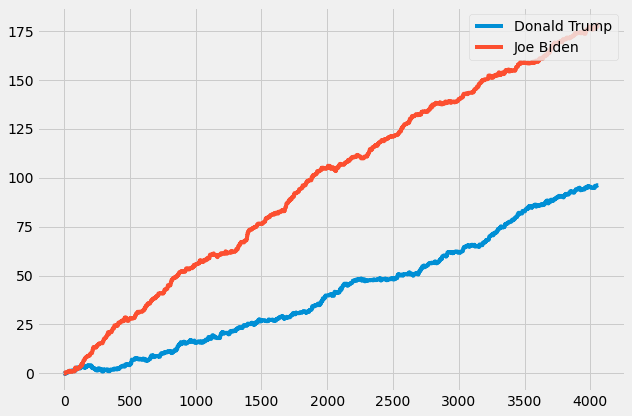

In [20]:
frame_len =10000
fig = plt.figure(figsize=(9,6))

def animate(i):
  data = pd.read_csv('/content/sentiment.csv')
  print("Total Trump Tweets:", cnt_trump_tweets,"\n","Total Biden Tweets:", cnt_biden_tweets )
  y1  = data['Trump']
  y2 = data['Biden']

  if len(y1)<=frame_len:
    plt.cla()
    plt.plot(y1,label='Donald Trump')
    plt.plot(y2, label='Joe Biden')
  else:
    plt.cla()
    plt.plot(y1[-frame_len:],label='Donald Trump')
    plt.plot(y2[-frame_len:],label='Joe biden')   
  
  plt.legend(loc='upper right')
  plt.tight_layout()
ani = FuncAnimation(plt.gcf(),animate,interval=100)

In [19]:
plt.show()